<a href="https://colab.research.google.com/github/Zamoca42/TIL/blob/main/AI/keras_Model_Retrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# 저장 된 모델 불러오기
model = keras.models.load_model('/content/drive/MyDrive/mnist_conv_gpu_e5.h5')
model.summary()

# MNIST 데이터셋 불러오기
(X_train, Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

# 데이터 전처리하기
X_test = X_test.astype('float32')/255.0
X_test = X_test.reshape(10000,28,28,1)

#load model 뒤에는 model Sequential과정 필요없음
# 이미 학습 된 모델이기 때문

# 모델 컴파일 compile
# opt = keras.optimizers.Adam(learning_rate=0.001)
# model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# 훈련하기 fit
# hist = model.fit(X_train, Y_train, batch_size = 8, epochs=5, validation_split=0.2, verbose = 1)

# 평가
loss, acc = model.evaluate(X_test,Y_test, verbose=2)
print("test loss:", loss)
print("test accuracy:", acc)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
# 이미지를 불러오는 방법

#1
from matplotlib import image

myimg1 = image.imread('1.jpg')

#2
import matplotlib.image as mpimg

myimg1 = mpimg.imread('1.jpg')

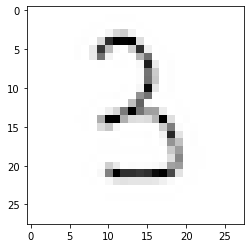

(28, 28)
****************************************************************************************************
1/1 [==============================] - 0s 64ms/step
predict:  [8]
True_value : 5
****************************************************************************************************
1/1 [==============================] - 0s 14ms/step
predict:  [8]
True_value : 3


In [29]:
import matplotlib.image as mpimg

# RGB 읽고 grayscale로 변환
myimg1 = mpimg.imread('5.png')

myimg1_grey = 255.0 - myimg1[:,:,0]

myimg2 = mpimg.imread('3.png')

myimg2_grey = 255.0 - myimg2[:,:,0]

plt.imshow(myimg2_grey, cmap='Greys', interpolation='nearest')
plt.show()

print(myimg2_grey.shape)

print('*'*100)

print("predict: ", np.argmax(model.predict(myimg1_grey.reshape(1,28,28,1)),axis=1))
print("True_value :", '5')

print('*'*100)

print("predict: ", np.argmax(model.predict(myimg2_grey.reshape(1,28,28,1)),axis=1))
print("True_value :", '3')